# Análisis de los Datos del Sistema Único de Atención Ciudadana de CABA 2020
**por Jessica Gamarra**

Este trabajo contiene un análisis de los datos de los contactos realizados al _Sistema Único de Atención Ciudadana (SUACI)_ que incluyen: fecha, concepto y referencia geográfica.
## Objetivo
El objetivo de este análisis es responder a las siguientes preguntas:

- ¿Cuál es el tipo de contacto predominante? 
- ¿Hay una estacionalidad en los registros de las denuncias según los meses?
- ¿Qué categorías tienen más contactos?
- ¿Hay diferencias en los contactos realizados al sistema según el género de la persona?
- ¿Hay comunas que presentan más denuncias que otras?
- ¿Cuál es el canal de comunucación más utilizado para realizar denuncias?



## Tabla de Contenidos
1. Carga de Datos
2. Exploración de Datos
3. Limpieza de Datos
4. Presentación de Datos
5. Conclusiones

## 1. Carga de Datos
En esta sección se cargarán los datos obtenidos de los contactos realizados al [_SUACI_](https://data.buenosaires.gob.ar/dataset/sistema-unico-atencion-ciudadana) durante el año 2020. 

In [1]:
#Se importan las librerias necesarias
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Se importan los datos
path_data = "datos/sistema-unico-de-atencion-ciudadana-2020.csv"
columnas= ["contacto", "periodo","categoria","subcategoria","concepto","tipo_prestacion",
           "domicilio_cgpc","domicilio_barrio","canal","genero","estado_del_contacto"]

df = pd.read_csv(path_data, usecols=columnas)
df.head(6)

C:\Users\jessica\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,contacto,periodo,categoria,subcategoria,concepto,tipo_prestacion,domicilio_cgpc,domicilio_barrio,canal,genero,estado_del_contacto
0,00000001/20,202001,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,COMUNA 6,CABALLITO,Comunas,Femenino,Cerrado
1,00000002/20,202001,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,COMUNA 4,PARQUE PATRICIOS,Comunas,Femenino,Cerrado
2,00000003/20,202001,ARBOLADO Y ESPACIOS VERDES,PLANTACIÓN DE ÁRBOL,PLANTACIÓN DE ÁRBOL,SOLICITUD,COMUNA 13,COLEGIALES,Comunas,Masculino,Cerrado
3,00000004/20,202001,ARBOLADO Y ESPACIOS VERDES,PLANTACIÓN DE ÁRBOL,PLANTACIÓN DE ÁRBOL,SOLICITUD,COMUNA 13,COLEGIALES,Comunas,Masculino,Abierto
4,00000005/20,202001,LIMPIEZA Y RECOLECCIÓN,LIMPIEZA DE VÍA PÚBLICA,RECOLECCIÓN DE RESIDUOS FUERA DEL CONTENEDOR,SOLICITUD,COMUNA 12,COGHLAN,Comunas,Femenino,Cerrado
5,00000006/20,202001,FISCALIZACIÓN ACTIVIDADES COMERCIALES,HABILITACIONES Y PERMISOS,ACTIVIDAD DE BAILE EFECTUADA SIN PERMISO,DENUNCIA,COMUNA 4,BARRACAS,Comunas,Masculino,Cerrado


## 2. Exploración de Datos
Se revisan los datos cargados para su posterior limpieza y análisis.

In [7]:
df.sample(7)

,contacto,periodo,categoria,subcategoria,concepto,tipo_prestacion,domicilio_cgpc,domicilio_barrio,canal,genero,estado_del_contacto
425522,00444993/20,202010,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,2.0,Recoleta,App BA 147,Femenino,Cerrado
197155,00209824/20,202003,NaN,NaN,DISTURBIOS - SUBTE,QUEJA,COMUNA 3,BALVANERA,NaN,Femenino,Cerrado
6563,00006852/20,202001,NaN,NaN,INCONVENIENTES CON EL RETIRO/DEVOLUCIÓN DE LA ...,QUEJA,COMUNA 14,PALERMO,147,Femenino,Cerrado
367004,00386958/20,202008,LIMPIEZA Y RECOLECCIÓN,RESIDUOS VOLUMINOSOS,RETIRO DE ESCOMBROS / RESTOS DE OBRA,SERVICIO,12.0,Villa Pueyrredon,App BA 147,Masculino,Cerrado
448755,00468013/20,202010,ARBOLADO Y ESPACIOS VERDES,PODA DE ÁRBOL Y DESPEJE DE LUMINARIA,PODA DE ÁRBOL/DESPEJE DE LUMINARIA O SEMÁFORO,SOLICITUD,13.0,Colegiales,GCS Web,Masculino,Abierto
526529,00546608/20,202012,LIMPIEZA Y RECOLECCIÓN,RESIDUOS VOLUMINOSOS,RETIRO DE ESCOMBROS / RESTOS DE OBRA,SERVICIO,1.0,San Nicolas,App BA 147,Masculino,Cerrado
42498,00044477/20,202001,CALLES Y VEREDAS,REPARACIÓN DE VEREDA,REPARACIÓN DE VEREDA POR RAÍCES DE ÁRBOL QUE P...,SOLICITUD,COMUNA 9,MATADEROS,Web,Femenino,Cerrado


- Se deberán corregir los valores perdidos de algunas variables para que no figuren como NaN. 
- También se deben unificar los nombres de las comunas de la variable domicilio_cgpc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574435 entries, 0 to 574434
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   contacto             574435 non-null  object
 1   periodo              574435 non-null  int64 
 2   categoria            390489 non-null  object
 3   subcategoria         388729 non-null  object
 4   concepto             574435 non-null  object
 5   tipo_prestacion      574435 non-null  object
 6   domicilio_cgpc       551318 non-null  object
 7   domicilio_barrio     551305 non-null  object
 8   canal                520035 non-null  object
 9   genero               501365 non-null  object
 10  estado_del_contacto  574435 non-null  object
dtypes: int64(1), object(10)
memory usage: 48.2+ MB



_No se registran valores nulos en ninguna de las variables_

In [5]:
df.shape

(574435, 11)

In [6]:
#Se revisan los valores únicos para cada variable
df.nunique()

contacto               571061
periodo                    12
categoria                  19
subcategoria               71
concepto                  287
tipo_prestacion             5
domicilio_cgpc             45
domicilio_barrio           96
canal                      14
genero                      3
estado_del_contacto         2
dtype: int64

- A partir de los datos del periodo podrían establecerse los meses para poder facilitar el análisis. 

## 3.Limpieza de los Datos
A partir de la información obtenida durante la exploración, se proceden a realizar las siguientes acciones:
  - Reemplazar los valores perdidos de las variables.
  - Unificar las entradas de los Domicilios por Comuna.
  - Agregar una columna que represente al Mes en el cual se realizó el contacto.
  - Comprobar si es necesario corregir otras diferencias de formato.
 

In [8]:
#Se verifican las diferentes categorías y se detecta la presencia de valores perdidos.
df.categoria.unique()

array(['TRÁNSITO', 'ARBOLADO Y ESPACIOS VERDES', 'LIMPIEZA Y RECOLECCIÓN',
       'FISCALIZACIÓN ACTIVIDADES COMERCIALES',
       'RECICLADO Y PROTECCIÓN AMBIENTAL', 'MEDIOS DE TRANSPORTE',
       'CONTROL EDILICIO, OBRAS Y CATASTRO', nan, 'PLUVIALES',
       'ALUMBRADO', 'ORDENAMIENTO DEL ESPACIO PÚBLICO',
       'CALLES Y VEREDAS', 'SEGURIDAD', 'TRÁMITES Y SERVICIOS',
       'SALUD Y SERVICIOS SOCIALES', 'BARRIOS EMERGENTES',
       'DESARROLLO URBANO', 'TERRENO BALDÍO', 'LOTBA', 'EDUCACION'],
      dtype=object)

In [12]:
#Se decide reemplazar a los valores perdidos por la leyenda "SIN CATEGORIA"

df.categoria.fillna('SIN CATEGORIA', inplace=True)
df.sample(10)

,contacto,periodo,categoria,subcategoria,concepto,tipo_prestacion,domicilio_cgpc,domicilio_barrio,canal,genero,estado_del_contacto
322305,00341493/20,202007,SIN CATEGORIA,NaN,SERVICIO DE ELECTRICIDAD,SOLICITUD,COMUNA 8,VILLA LUGANO,NaN,NaN,Cerrado
557344,00575670/20,202012,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,15.0,Villa Crespo,App Denuncia Vial,Femenino,Cerrado
413411,00432666/20,202009,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,12.0,Villa Urquiza,App Denuncia Vial,Masculino,Cerrado
449798,00467919/20,202010,LIMPIEZA Y RECOLECCIÓN,LIMPIEZA DE VÍA PÚBLICA,RECOLECCIÓN DE RESIDUOS FUERA DEL CONTENEDOR,SOLICITUD,11.0,Villa Del Parque,App BA 147,Masculino,Cerrado
222199,00237016/20,202004,LIMPIEZA Y RECOLECCIÓN,LIMPIEZA DE VÍA PÚBLICA,RECOLECCIÓN DE RESIDUOS FUERA DEL CONTENEDOR,SOLICITUD,COMUNA 13,NUÑEZ,App,Masculino,Cerrado
178877,00188565/20,202003,SIN CATEGORIA,NaN,DESOBSTRUCCIÓN (VACTOR),SOLICITUD,COMUNA 4,BARRACAS,NaN,NaN,Cerrado
242731,00259086/20,202005,SIN CATEGORIA,NaN,DESOBSTRUCCIÓN (VACTOR),SOLICITUD,COMUNA 7,FLORES,NaN,NaN,Cerrado
458447,00475814/20,202010,LIMPIEZA Y RECOLECCIÓN,CESTOS Y CONTENEDORES,INSTALACIÓN DE CONTENEDOR,SOLICITUD,12.0,Villa Urquiza,GCS Web,Femenino,Cerrado
218498,00232906/20,202004,FISCALIZACIÓN ACTIVIDADES COMERCIALES,HABILITACIONES Y PERMISOS,ESTABLECIMIENTO SIN HABILITACIÓN,DENUNCIA,COMUNA 3,SAN CRISTOBAL,Comunas,Femenino,Abierto
529892,00548670/20,202012,LIMPIEZA Y RECOLECCIÓN,RESIDUOS VOLUMINOSOS,RETIRO DE RESTOS DE JARDINERÍA DOMICILIARIA,SERVICIO,11.0,Villa Devoto,GCS Web,Femenino,Cerrado


_Análogamente, se reemplazan los NaN de las subcategorías por la leyenda "SIN SUBCATEGORÍAS"

In [13]:
df.categoria.unique()

array(['TRÁNSITO', 'ARBOLADO Y ESPACIOS VERDES', 'LIMPIEZA Y RECOLECCIÓN',
       'FISCALIZACIÓN ACTIVIDADES COMERCIALES',
       'RECICLADO Y PROTECCIÓN AMBIENTAL', 'MEDIOS DE TRANSPORTE',
       'CONTROL EDILICIO, OBRAS Y CATASTRO', 'SIN CATEGORIA', 'PLUVIALES',
       'ALUMBRADO', 'ORDENAMIENTO DEL ESPACIO PÚBLICO',
       'CALLES Y VEREDAS', 'SEGURIDAD', 'TRÁMITES Y SERVICIOS',
       'SALUD Y SERVICIOS SOCIALES', 'BARRIOS EMERGENTES',
       'DESARROLLO URBANO', 'TERRENO BALDÍO', 'LOTBA', 'EDUCACION'],
      dtype=object)

In [ ]:
df.subcategoria.unique()

In [14]:
df.subcategoria.fillna('SIN SUBCATEGORIA', inplace=True)
df

,contacto,periodo,categoria,subcategoria,concepto,tipo_prestacion,domicilio_cgpc,domicilio_barrio,canal,genero,estado_del_contacto
0,00000001/20,202001,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,COMUNA 6,CABALLITO,Comunas,Femenino,Cerrado
1,00000002/20,202001,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,COMUNA 4,PARQUE PATRICIOS,Comunas,Femenino,Cerrado
2,00000003/20,202001,ARBOLADO Y ESPACIOS VERDES,PLANTACIÓN DE ÁRBOL,PLANTACIÓN DE ÁRBOL,SOLICITUD,COMUNA 13,COLEGIALES,Comunas,Masculino,Cerrado
3,00000004/20,202001,ARBOLADO Y ESPACIOS VERDES,PLANTACIÓN DE ÁRBOL,PLANTACIÓN DE ÁRBOL,SOLICITUD,COMUNA 13,COLEGIALES,Comunas,Masculino,Abierto
4,00000005/20,202001,LIMPIEZA Y RECOLECCIÓN,LIMPIEZA DE VÍA PÚBLICA,RECOLECCIÓN DE RESIDUOS FUERA DEL CONTENEDOR,SOLICITUD,COMUNA 12,COGHLAN,Comunas,Femenino,Cerrado
...,...,...,...,...,...,...,...,...,...,...,...
574430,00564129/20,202012,"CONTROL EDILICIO, OBRAS Y CATASTRO",CONTROL DE OBRAS,CONSTRUCCIÓN SIN PERMISO,DENUNCIA,10.0,Villa Luro,App BA 147,Masculino,Cerrado
574431,00593840/20,202012,"CONTROL EDILICIO, OBRAS Y CATASTRO",CONTROL DE OBRAS,FALTA DE CARTEL DE PERMISO/AVISO DE OBRA/CONST...,DENUNCIA,10.0,Villa Luro,App BA 147,Masculino,Cerrado
574432,00554868/20,202012,ARBOLADO Y ESPACIOS VERDES,EXTRACCIÓN DE ÁRBOL,EXTRACCIÓN DE ÁRBOL,SOLICITUD,3.0,San Cristobal,GCS Web,Masculino,Cerrado
574433,00580083/20,202012,"CONTROL EDILICIO, OBRAS Y CATASTRO",CONTROL DE OBRAS,CONSTRUCCIÓN SIN PERMISO,DENUNCIA,9.0,Parque Avellaneda,GCS Web,Masculino,Cerrado


In [ ]:
df.subcategoria.unique()

In [ ]:
df.concepto.unique()

In [ ]:
df.tipo_prestacion.unique()

In [20]:
#Se revisan las diferentes valores ingresados para las comunas 

df.domicilio_cgpc.unique()

array(['COMUNA 6', 'COMUNA 4', 'COMUNA 13', 'COMUNA 12', 'COMUNA 5',
       'COMUNA 7', 'COMUNA 14', 'COMUNA 10', 'COMUNA 9', 'COMUNA 1',
       'COMUNA 11', 'COMUNA 8', 'COMUNA 15', nan, 'COMUNA 3', 'COMUNA 2',
       '9.0', '12.0', '4.0', '2.0', '7.0', '10.0', '14.0', '15.0', '11.0',
       '3.0', '13.0', '8.0', '5.0', '1.0', '6.0', 1.0, 7.0, 11.0, 12.0,
       6.0, 4.0, 9.0, 15.0, 5.0, 10.0, 3.0, 14.0, 13.0, 2.0, 8.0],
      dtype=object)

In [21]:
df.tail(9)

,contacto,periodo,categoria,subcategoria,concepto,tipo_prestacion,domicilio_cgpc,domicilio_barrio,canal,genero,estado_del_contacto
574426,00584865/20,202012,"CONTROL EDILICIO, OBRAS Y CATASTRO",CONTROL DE OBRAS,ALTURA ANTIRREGLAMENTARIA EN OBRAS Y CONSTRUCC...,DENUNCIA,9.0,Mataderos,GCS Web,MASCULINO,Cerrado
574427,00590845/20,202012,TRÁNSITO,VEHÍCULOS ABANDONADOS,REMOCIÓN DE VEHÍCULO / AUTO ABANDONADO,SOLICITUD,15.0,Chacarita,Mail 147,MASCULINO,Cerrado
574428,00577568/20,202012,ARBOLADO Y ESPACIOS VERDES,EXTRACCIÓN DE ÁRBOL,EXTRACCIÓN DE ÁRBOL,SOLICITUD,11.0,Villa Santa Rita,GCS Web,MASCULINO,Cerrado
574429,00572861/20,202012,"CONTROL EDILICIO, OBRAS Y CATASTRO",CONTROL DE OBRAS,CONSTRUCCIÓN SIN PERMISO,DENUNCIA,10.0,Villa Luro,App BA 147,FEMENINO,Cerrado
574430,00564129/20,202012,"CONTROL EDILICIO, OBRAS Y CATASTRO",CONTROL DE OBRAS,CONSTRUCCIÓN SIN PERMISO,DENUNCIA,10.0,Villa Luro,App BA 147,MASCULINO,Cerrado
574431,00593840/20,202012,"CONTROL EDILICIO, OBRAS Y CATASTRO",CONTROL DE OBRAS,FALTA DE CARTEL DE PERMISO/AVISO DE OBRA/CONST...,DENUNCIA,10.0,Villa Luro,App BA 147,MASCULINO,Cerrado
574432,00554868/20,202012,ARBOLADO Y ESPACIOS VERDES,EXTRACCIÓN DE ÁRBOL,EXTRACCIÓN DE ÁRBOL,SOLICITUD,3.0,San Cristobal,GCS Web,MASCULINO,Cerrado
574433,00580083/20,202012,"CONTROL EDILICIO, OBRAS Y CATASTRO",CONTROL DE OBRAS,CONSTRUCCIÓN SIN PERMISO,DENUNCIA,9.0,Parque Avellaneda,GCS Web,MASCULINO,Cerrado
574434,00584748/20,202012,LIMPIEZA Y RECOLECCIÓN,LIMPIEZA DE VÍA PÚBLICA,"DESRATIZAR, DESINSECTAR Y DESINFECTAR EN VÍA P...",SOLICITUD,13.0,Colegiales,App BA 147,FEMENINO,Abierto


In [24]:
#Se reemplazan los valores de la variable por los nombres de las comunas

df.domicilio_cgpc=df.domicilio_cgpc.replace(to_replace=['9.0','12.0','4.0','2.0','7.0','10.0','14.0','15.0',
                                      '11.0','3.0','13.0','8.0','5.0','1.0','6.0'],
                          value=['COMUNA 9','COMUNA 12','COMUNA 4','COMUNA 2','COMUNA 7','COMUNA 10','COMUNA 14','COMUNA 15',
                                 'COMUNA 11','COMUNA 3','COMUNA 13','COMUNA 8','COMUNA 5','COMUNA 1','COMUNA 6'])
df.sample(4)

,contacto,periodo,categoria,subcategoria,concepto,tipo_prestacion,domicilio_cgpc,domicilio_barrio,canal,genero,estado_del_contacto
236443,00252208/20,202005,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,COMUNA 12,VILLA URQUIZA,Comunas,MASCULINO,Cerrado
463521,00482718/20,202010,LIMPIEZA Y RECOLECCIÓN,RESIDUOS VOLUMINOSOS,RETIRO DE ESCOMBROS / RESTOS DE OBRA,SERVICIO,12.0,Villa Urquiza,App BA 147,FEMENINO,Cerrado
567620,00587627/20,202012,LIMPIEZA Y RECOLECCIÓN,RESIDUOS VOLUMINOSOS,RETIRO DE ESCOMBROS / RESTOS DE OBRA,SERVICIO,7.0,Flores,GCS Web,MASCULINO,Cerrado
296569,00315351/20,202006,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,COMUNA 8,VILLA LUGANO,Comunas,MASCULINO,Cerrado


In [26]:
#Se reemplazan los valores numéricos faltantes
df.domicilio_cgpc=df.domicilio_cgpc.replace(to_replace=[1.0,7.0,11.0,12.0,6.0,4.0,9.0,15.0,
                                      5.0,10.0,3.0,14.0,13.0,2.0,8.0],
                          value=['COMUNA 1','COMUNA 7','COMUNA 11','COMUNA 12','COMUNA 6','COMUNA 4','COMUNA 9','COMUNA 15',
                                 'COMUNA 5','COMUNA 10','COMUNA 3','COMUNA 14','COMUNA 13','COMUNA 2','COMUNA 8'])

In [30]:
#Se reemplazan los valores perdidos por "SIN COMUNA"
df.domicilio_cgpc.fillna('SIN COMUNA', inplace=True)

In [31]:
df.domicilio_cgpc.unique()

array(['COMUNA 6', 'COMUNA 4', 'COMUNA 13', 'COMUNA 12', 'COMUNA 5',
       'COMUNA 7', 'COMUNA 14', 'COMUNA 10', 'COMUNA 9', 'COMUNA 1',
       'COMUNA 11', 'COMUNA 8', 'COMUNA 15', 'SIN COMUNA', 'COMUNA 3',
       'COMUNA 2'], dtype=object)

In [ ]:
df.domicilio_barrio.unique()

In [ ]:
df.canal.unique()

In [15]:
#Se revisan los valores de la variable género

df.genero.unique()

array(['Femenino', 'Masculino', nan, 'Otros'], dtype=object)

In [32]:
#Se reemplazan los valores perdidos por la categoría "SIN GENERO"

df.genero.fillna('SIN GENERO', inplace=True)

In [19]:
#Se unifica el formato de las categorías

df.genero=df.genero.str.upper()
df.genero

0          FEMENINO
1          FEMENINO
2         MASCULINO
3         MASCULINO
4          FEMENINO
            ...    
574430    MASCULINO
574431    MASCULINO
574432    MASCULINO
574433    MASCULINO
574434     FEMENINO
Name: genero, Length: 574435, dtype: object

In [33]:
df.periodo.unique()

array([202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
       202009, 202010, 202011, 202012], dtype=int64)

In [34]:
#Se modifica el formato del periodo para poder crear la variable mes
df['mes'] = df.periodo.astype(str).str[-2:]

df.mes.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [36]:
#Se reemplazan los valores de la variable por los nombres de los meses

df.mes=df.mes.replace(to_replace=['01','02','03','04','05','06','07','08','09','10','11','12'],value=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'])
df.sample(4)

,contacto,periodo,categoria,subcategoria,concepto,tipo_prestacion,domicilio_cgpc,domicilio_barrio,canal,genero,estado_del_contacto,mes
218172,00232534/20,202004,LIMPIEZA Y RECOLECCIÓN,CESTOS Y CONTENEDORES,VACIADO DE CAMPANA VERDE,SOLICITUD,COMUNA 3,SAN CRISTOBAL,Comunas,FEMENINO,Cerrado,Abril
135153,00140693/20,202002,TRÁNSITO,VEHÍCULOS ABANDONADOS,REMOCIÓN DE VEHÍCULO / AUTO ABANDONADO,SOLICITUD,COMUNA 15,VILLA CRESPO,Comunas,MASCULINO,Cerrado,Febrero
120725,00125701/20,202002,SIN CATEGORIA,SIN SUBCATEGORIA,INCONVENIENTES CON EL RETIRO/DEVOLUCIÓN DE LA ...,QUEJA,COMUNA 6,CABALLITO,147,MASCULINO,Cerrado,Febrero
298653,00317478/20,202006,TRÁNSITO,DENUNCIA VIAL,VEHÍCULO MAL ESTACIONADO,DENUNCIA,COMUNA 11,VILLA SANTA RITA,Comunas,MASCULINO,Cerrado,Junio


In [37]:
df.to_csv('datos/suaci_limpio.csv')

## 4. Presentación de Datos

A continuación, se presentan algunos de los principales cuadros y gráficos realizados.

In [40]:
#Se analizan las frecuencias de la variable categoría

df_categoria = pd.DataFrame({"Categoria": df["categoria"].value_counts().index,
                                  "Cantidad": df["categoria"].value_counts().values
                                 })
df_categoria

,Categoria,Cantidad
0,SIN CATEGORIA,183946
1,TRÁNSITO,120118
2,LIMPIEZA Y RECOLECCIÓN,116375
3,CALLES Y VEREDAS,29681
4,ARBOLADO Y ESPACIOS VERDES,28909
5,RECICLADO Y PROTECCIÓN AMBIENTAL,15719
6,ALUMBRADO,15704
7,ORDENAMIENTO DEL ESPACIO PÚBLICO,15091
8,MEDIOS DE TRANSPORTE,12808
9,FISCALIZACIÓN ACTIVIDADES COMERCIALES,10377


In [41]:
#Se realiza el conteo de las subcategorías

subcategoria = pd.Series(df['subcategoria'])
df_subcategoria = pd.DataFrame({"Subcategoria": subcategoria.str.upper().value_counts().index,
                                     "Cantidad": subcategoria.str.upper().value_counts().values
                                   })
df_subcategoria

,Subcategoria,Cantidad
0,SIN SUBCATEGORIA,185706
1,DENUNCIA VIAL,108336
2,RESIDUOS VOLUMINOSOS,70768
3,CESTOS Y CONTENEDORES,26913
4,LIMPIEZA DE VÍA PÚBLICA,18018
...,...,...
67,DESAGOTE,13
68,MANTENIMIENTO ESTABLECIMIENTOS EDUCATIVOS,7
69,PROBLEMAS CON PERSONAL POLICIAL,6
70,CARTEL INDICADOR DE CALLES,2


In [42]:
# Se realizan las frecuencias del Tipo de Contacto realizado 

tipo_prestacion= pd.Series(df['tipo_prestacion'])
df_tipo_prestacion = pd.DataFrame({"Tipo Prestacion": tipo_prestacion.str.upper().value_counts().index,
                                    "Cantidad": tipo_prestacion.str.upper().value_counts().values
                                   })
df_tipo_prestacion

,Tipo Prestacion,Cantidad
0,SOLICITUD,219153
1,DENUNCIA,142717
2,SERVICIO,140192
3,QUEJA,68126
4,REPORTE,4247


In [43]:
df_porc_tipo_prest = pd.DataFrame({"Tipo Prestacion": tipo_prestacion.str.upper().value_counts().index,
                                    "Porcentaje": round(tipo_prestacion.str.upper().value_counts(normalize=True)*100,2).values
                                  })
df_porc_tipo_prest

,Tipo Prestacion,Porcentaje
0,SOLICITUD,38.15
1,DENUNCIA,24.84
2,SERVICIO,24.41
3,QUEJA,11.86
4,REPORTE,0.74


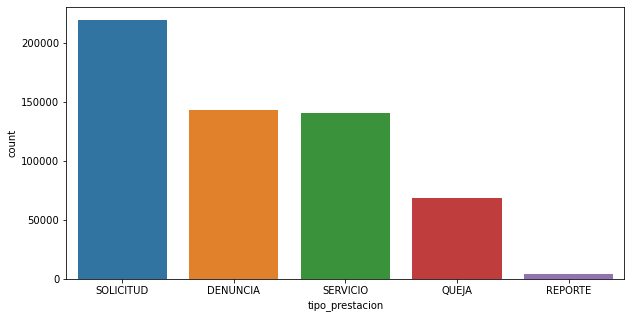

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data = df,
              x = "tipo_prestacion", 
              order = tipo_prestacion.str.upper().value_counts().index)
plt.show()

In [45]:
#Se realiza la tabla de los Contactos por Mes

df_mes = pd.DataFrame({"Mes": df["mes"].value_counts().index,
                           "Cantidad": df["mes"].value_counts().values
                          })
df_mes

,Mes,Cantidad
0,Enero,75441
1,Febrero,73133
2,Marzo,64408
3,Noviembre,51777
4,Octubre,49549
5,Diciembre,48884
6,Septiembre,44106
7,Agosto,39474
8,Junio,36422
9,Mayo,35481


In [46]:
df_porc_mes = pd.DataFrame({"Tipo Prestacion": df["mes"].value_counts().index,
                             "Porcentaje": round(df["mes"].value_counts(normalize=True)*100,2).values
                          })
df_porc_mes

,Tipo Prestacion,Porcentaje
0,Enero,13.13
1,Febrero,12.73
2,Marzo,11.21
3,Noviembre,9.01
4,Octubre,8.63
5,Diciembre,8.51
6,Septiembre,7.68
7,Agosto,6.87
8,Junio,6.34
9,Mayo,6.18


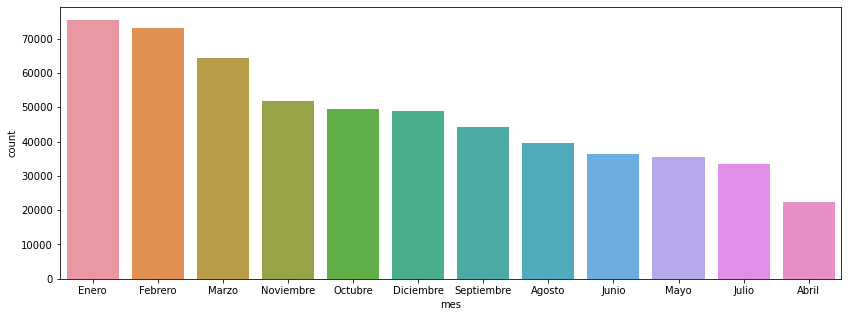

In [47]:
plt.figure(figsize=(14,5))
sns.countplot(data = df,
              x = "mes", 
              order = df["mes"].value_counts().index)
plt.show()

In [62]:
#Se analizan los contactos realizados por género

genero = pd.Series(df['genero'])
df_genero = pd.DataFrame({"Genero": genero.value_counts().index,
                         "Cantidad": genero.value_counts().values
                                })
df_genero

,Genero,Cantidad
0,MASCULINO,270885
1,FEMENINO,229948
2,SIN GENERO,73070
3,OTROS,532


In [52]:
df_porc_genero = pd.DataFrame({"Genero": genero.value_counts().index,
                              "Porcentaje": round((genero).value_counts(normalize=True)*100,2).values
                             })
df_porc_genero

,Genero,Porcentaje
0,MASCULINO,47.16
1,FEMENINO,40.03
2,SIN GENERO,12.72
3,OTROS,0.09


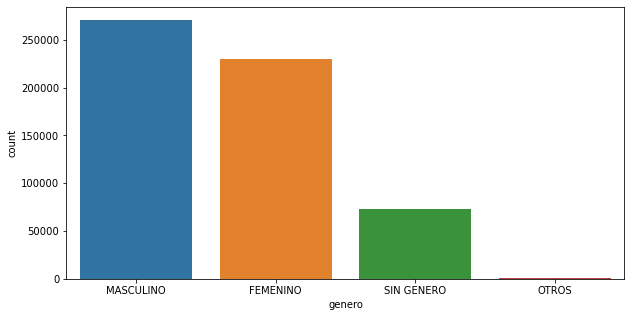

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data = df,
              x = "genero", 
              order = genero.value_counts().index)
plt.show()

In [55]:
#Se toman los contactos por denuncias

df_denuncia = df.loc[(df.tipo_prestacion == 'DENUNCIA') ,['domicilio_cgpc','categoria','subcategoria', 'canal']]
df_denuncia.head(5)

,domicilio_cgpc,categoria,subcategoria,canal
0,COMUNA 6,TRÁNSITO,DENUNCIA VIAL,Comunas
1,COMUNA 4,TRÁNSITO,DENUNCIA VIAL,Comunas
5,COMUNA 4,FISCALIZACIÓN ACTIVIDADES COMERCIALES,HABILITACIONES Y PERMISOS,Comunas
7,COMUNA 12,TRÁNSITO,DENUNCIA VIAL,Comunas
8,COMUNA 13,TRÁNSITO,DENUNCIA VIAL,Comunas


In [56]:
#Se cuentan las denuncias por Comuna

df_den_tipo_prestacion = pd.DataFrame({"Comuna": df_denuncia["domicilio_cgpc"].value_counts().index,
                                       "Cantidad": df_denuncia["domicilio_cgpc"].value_counts().values
                                       })
df_den_tipo_prestacion

,Comuna,Cantidad
0,COMUNA 12,16477
1,COMUNA 13,14332
2,COMUNA 14,13539
3,COMUNA 11,11412
4,COMUNA 15,11057
5,COMUNA 10,10327
6,COMUNA 7,9317
7,COMUNA 6,9244
8,COMUNA 5,7993
9,COMUNA 1,7298


In [57]:

df_den_tipo_prest_porc = pd.DataFrame({"Comuna": df_denuncia["domicilio_cgpc"].value_counts().index,
                                            "Porcentaje": round(df_denuncia["domicilio_cgpc"].value_counts(normalize=True)*100,2).values
                                           })
df_den_tipo_prest_porc

,Comuna,Porcentaje
0,COMUNA 12,11.55
1,COMUNA 13,10.04
2,COMUNA 14,9.49
3,COMUNA 11,8.00
4,COMUNA 15,7.75
5,COMUNA 10,7.24
6,COMUNA 7,6.53
7,COMUNA 6,6.48
8,COMUNA 5,5.60
9,COMUNA 1,5.11


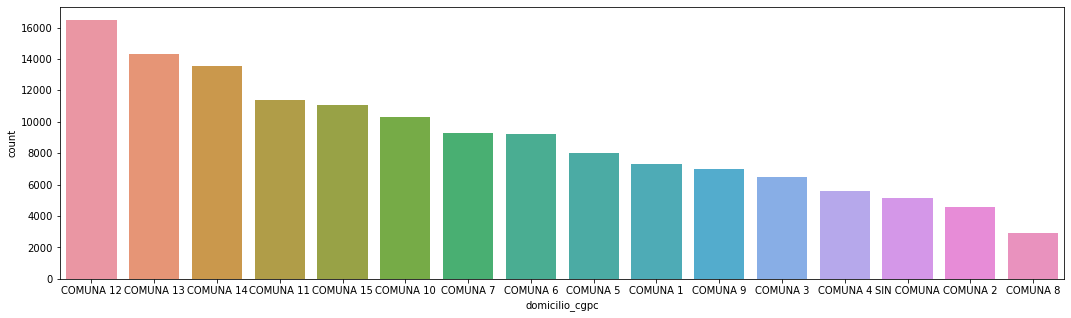

In [58]:
plt.figure(figsize=(18,5))
sns.countplot(data = df_denuncia,
              x = "domicilio_cgpc", 
              order = df_denuncia["domicilio_cgpc"].value_counts().index)
plt.show()

In [59]:
#Se revisan las denuncias según el canal a través del cual se realizaron

df_den_canal = pd.DataFrame({"Canal": df_denuncia["canal"].value_counts().index,
                                   "Cantidad": df_denuncia["canal"].value_counts().values
                                  })
df_den_canal

,Canal,Cantidad
0,Comunas,60100
1,App Denuncia Vial,40201
2,App BA 147,10931
3,147,10248
4,GCS Web,8319
5,App,7656
6,Boti,2704
7,Web,364
8,Operador GCBA,269
9,Call Center,70


In [60]:
df_den_canal = pd.DataFrame({"Canal": df_denuncia["canal"].value_counts().index,
                                   "Porcentaje": round(df_denuncia["canal"].value_counts(normalize=True)*100,2).values
                                  })
df_den_canal

,Canal,Porcentaje
0,Comunas,42.63
1,App Denuncia Vial,28.51
2,App BA 147,7.75
3,147,7.27
4,GCS Web,5.90
5,App,5.43
6,Boti,1.92
7,Web,0.26
8,Operador GCBA,0.19
9,Call Center,0.05


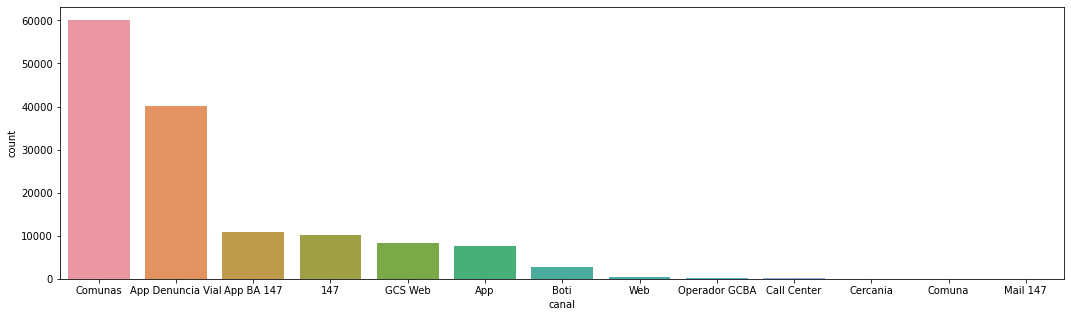

In [61]:
plt.figure(figsize=(18,5))
sns.countplot(data = df_denuncia,
              x = "canal", 
              order = df_denuncia["canal"].value_counts().index)
plt.show()

## 5. Conclusiones

- El tipo de contacto predominante son las _Solicitudes_, seguidas por las _Denuncias_. 

- Se pudo observar que la _mayor cantidad de Contactos durante el Verano_. Pero deberían analizarse los datos correspondientes a otros años para poder afirmar si los datos presentan esa tendencia de estacionalidad. 

- Las categorías que presentan los mayores contactos son _"Tránsito"_ y _"Limpieza y recolección"_.

- El género _no pareciera ser una variable que influya en la cantidad de contactos que se realizan_.Sin embargo, debería realizarse alguna prueba estadística para poder asegurarlo.  

- Las Comunas 12, 13 y 14 son las que presentan mayor cantidad de Denuncias.

- Los canales de comunicación para realizar Denuncias fueron las _Comunas_, la _App Denuncia Vial_ y la _App BA 147_. 
